In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
csv = pd.read_csv('lfd_2023_group2test.csv')
csv.info()
# 有空的格子全在第一格，可能是設計的
#缺失的資料正好在5%以內，可以直接drop掉(249, 超靠邀)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   grams       4751 non-null   float64
 1   width_cm    5000 non-null   int64  
 2   length_cm   5000 non-null   int64  
 3   wavelength  5000 non-null   int64  
 4   country     5000 non-null   object 
 5   cost        5000 non-null   int64  
 6   recoil      5000 non-null   float64
 7   y_offset    5000 non-null   float64
 8   shape       5000 non-null   object 
 9   distance    5000 non-null   float64
 10  target      5000 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 429.8+ KB


In [3]:
csv2 = csv.dropna()
csv3 = csv2.drop_duplicates()
csv3.info()
csvd = csv3

<class 'pandas.core.frame.DataFrame'>
Index: 4751 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   grams       4751 non-null   float64
 1   width_cm    4751 non-null   int64  
 2   length_cm   4751 non-null   int64  
 3   wavelength  4751 non-null   int64  
 4   country     4751 non-null   object 
 5   cost        4751 non-null   int64  
 6   recoil      4751 non-null   float64
 7   y_offset    4751 non-null   float64
 8   shape       4751 non-null   object 
 9   distance    4751 non-null   float64
 10  target      4751 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 445.4+ KB


In [4]:
v = csv3['target'].value_counts()
v

target
widget4    535
widget3    533
widget1    531
widget2    531
widget8    529
widget7    524
widget9    524
widget6    524
widget5    520
Name: count, dtype: int64

In [5]:
csvX = csv3.drop('target',axis=1)
csvy = csv3['target']
csvX.to_csv('csvX.csv', index=False)
csvy.to_csv('csvy.csv', index=False)

In [9]:
#處理非數值的數據   #from GPT

encoder = OneHotEncoder(sparse=False)

categorical_columns = csvX.select_dtypes(include=['object']).columns
encoded_data = encoder.fit_transform(csvX[categorical_columns])
encoded_csv = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

csv4 = csvX.drop(categorical_columns, axis=1)
csv4 = pd.concat([csv4, encoded_csv], axis=1)

#for column in csvX.select_dtypes(include=['object']).columns:
#    csvX[column] = encoder.fit_transform(csvX[column])
csvX.info()

X = csvX                     #csv3.drop('target',axis=1)
y = csvy                     #csv3['target']
X.to_csv('X.csv', index=False)
y.to_csv('y.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 4751 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   grams       4751 non-null   float64
 1   width_cm    4751 non-null   int64  
 2   length_cm   4751 non-null   int64  
 3   wavelength  4751 non-null   int64  
 4   country     4751 non-null   object 
 5   cost        4751 non-null   int64  
 6   recoil      4751 non-null   float64
 7   y_offset    4751 non-null   float64
 8   shape       4751 non-null   object 
 9   distance    4751 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 537.3+ KB


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


widget7
widget1
widget5
widget9
widget4
widget6
widget2
widget8
widget3


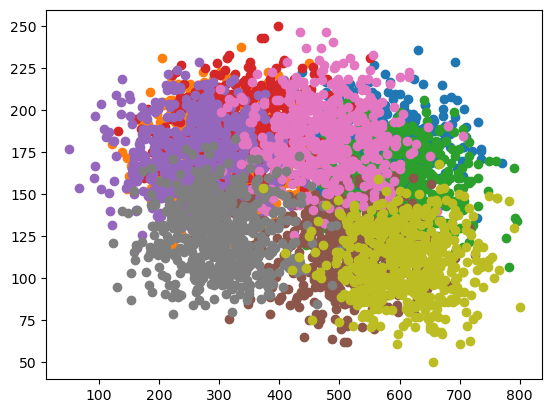

In [11]:
feature1 = 'grams'
feature2 = 'width_cm'

target = csvd['target'].unique()
#colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

for name in target:
    print(name)
    plt.scatter(csvd[csvd['target'] == name][feature1], csvd[csvd['target'] == name][feature2]) #, c=colors[name])

plt.show()

widget7
widget1
widget5
widget9
widget4
widget6
widget2
widget8
widget3


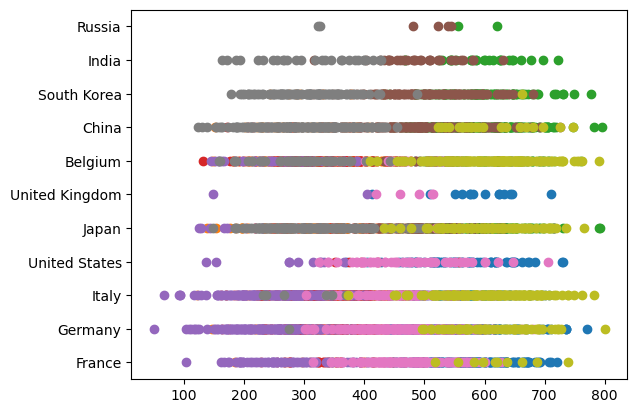

In [12]:
feature1 = 'grams'
feature2 = 'country'

target = csvd['target'].unique()
#colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

for name in target:
    print(name)
    plt.scatter(csvd[csvd['target'] == name][feature1], csvd[csvd['target'] == name][feature2]) #, c=colors[name])

plt.show()

widget7
widget1
widget5
widget9
widget4
widget6
widget2
widget8
widget3


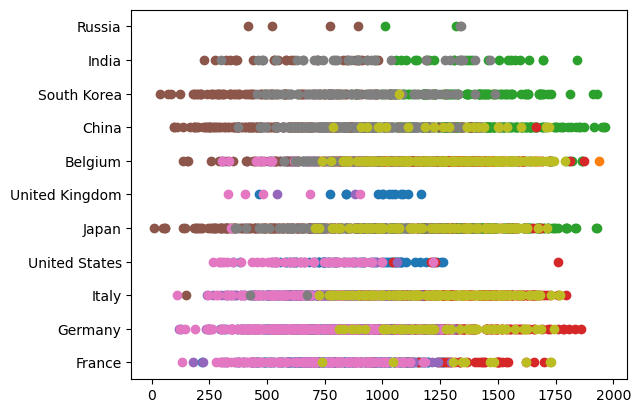

In [13]:
feature1 = 'cost'
feature2 = 'country'

target = csvd['target'].unique()
#colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

for name in target:
    print(name)
    plt.scatter(csvd[csvd['target'] == name][feature1], csvd[csvd['target'] == name][feature2]) #, c=colors[name])

plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

ValueError: Found input variables with inconsistent numbers of samples: [4988, 4751]

In [12]:
#特徵縮放，使具有單位方差 GPT
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

朴素貝葉斯是一種基於貝葉斯定理的簡單但有效的概率分類方法。它在給定的特徵集合中，假設所有特徵彼此獨立。

貝葉斯定理：此定理描述了兩個條件概率之間的關係，即
P(A∣B)= P(B∣A)P(A) / P(B)
 。在朴素貝葉斯中，A表示類別，B表示特徵。
 
特徵獨立性假設：朴素貝葉斯的「朴素」之處在於它假設每個特徵在給定類別的條件下都是獨立的。這使得計算變得更簡單，但也可能限制模型在特徵相關時的準確性。

In [86]:
#naive bayes
model = GaussianNB()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Japan'

In [14]:
pred_tr = model.predict(X_train)
pred_te = model.predict(X_test)

accuracytr = accuracy_score(y_train, pred_tr)
accuracy = accuracy_score(y_test, pred_te)
#accuracy
print("Accuracy on training data: ", accuracytr)
print("Accuracy on test data: ", accuracy)

Accuracy on training data:  0.9768421052631578
Accuracy on test data:  0.9810725552050473


In [15]:
scores = cross_val_score(model, X, y, cv=10)
scores

array([0.98529412, 0.96631579, 0.97684211, 0.97263158, 0.97052632,
       0.98315789, 0.97052632, 0.97894737, 0.98315789, 0.97894737])

In [16]:
scores.mean()

0.9766346749226006

In [17]:
scores.std()

0.006065963637073969

In [18]:
#GPT
report = classification_report(y_test, pred_te)
report

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99        94\n           1       0.98      0.94      0.96       101\n           2       1.00      0.99      0.99        94\n           3       0.98      0.99      0.99       109\n           4       0.97      0.98      0.98       108\n           5       0.95      0.97      0.96       119\n           6       0.97      0.98      0.98       111\n           7       0.99      0.99      0.99       118\n           8       1.00      1.00      1.00        97\n\n    accuracy                           0.98       951\n   macro avg       0.98      0.98      0.98       951\nweighted avg       0.98      0.98      0.98       951\n'

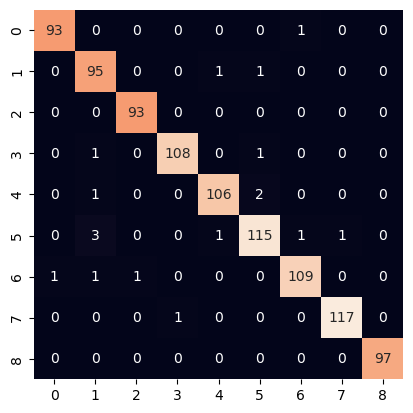

In [19]:
mat = confusion_matrix(y_test, pred_te)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=model.classes_, yticklabels=model.classes_)
plt.show()

------------------------------------------------------------------------
隨機森林是一種集成學習方法，它結合了多個決策樹以提高預測的準確性和穩定性。

決策樹：隨機森林中的每個樹都是一個決策樹，它通過劃分特徵空間來做出預測。

集成學習：隨機森林將多個決策樹的預測結果進行結合（例如，透過投票），以提高整體模型的性能和穩定性。

特徵和數據的隨機選擇：為了提高樹之間的多樣性，隨機森林在構建每棵樹時會隨機選擇特徵和數據樣本。

減少過擬合：相較於單個決策樹，隨機森林通常能更好地泛化，減少過擬合問題。

In [20]:
# random forest?
rf = {
    'n_estimators': 100,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'bootstrap': True,
    'random_state': 40
}

model2 = RandomForestClassifier(**rf)
model2.fit(X_train, y_train)

pred2 = model2.predict(X_test)


In [21]:
accu2 = accuracy_score(y_test, pred2)
accu2

0.9779179810725552

In [19]:
rf_report = classification_report(y_test, pred2)
rf_report

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99        94\n           1       0.98      0.96      0.97       101\n           2       0.98      0.99      0.98        94\n           3       0.96      0.98      0.97       109\n           4       0.97      0.99      0.98       108\n           5       0.97      0.94      0.95       119\n           6       0.99      0.97      0.98       111\n           7       0.98      0.97      0.98       118\n           8       0.98      1.00      0.99        97\n\n    accuracy                           0.98       951\n   macro avg       0.98      0.98      0.98       951\nweighted avg       0.98      0.98      0.98       951\n'

----------------------------------------------------------------------
支持向量機是一種強大的監督學習方法，用於分類和迴歸分析。它通過找到能最大化類別之間邊界的超平面來進行分類。

最大邊界分類器：SVM的核心思想是找到一個決策邊界（超平面），使得不同類別之間的邊界最大化。

支持向量：支持向量是距離決策邊界最近的數據點，這些點對於定義決策邊界至關重要。

核技巧：SVM可以通過核技巧將數據映射到更高維度空間中，以解決非線性可分的問提

In [60]:
#support venctor machine
svc = {
    'C': 1.0,          #C越大越嘗試最大限度正確分類訓練數據
    'kernel':'linear',   #如何將數據點映射到更高維度。rbf用於非線性問題常用
    #'gamma': 'scale'   #for rbf poly sigmoid核，定義單個訓練樣本影響的範圍
}
#scale代表自動從特徵的標準差算出來

model3 = SVC(**svc)
model3.fit(X_train, y_train)

pred3 = model3.predict(X_test)

In [63]:
accu3 = accuracy_score(y_test, pred3)
accu3

0.9663512092534174

In [49]:
svc_report = classification_report(y_test, pred3)
svc_report

'              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98        94\n           1       0.95      0.96      0.96       101\n           2       0.96      0.96      0.96        94\n           3       0.96      0.99      0.98       109\n           4       0.96      0.96      0.96       108\n           5       0.97      0.95      0.96       119\n           6       0.96      0.94      0.95       111\n           7       0.97      0.97      0.97       118\n           8       1.00      0.99      0.99        97\n\n    accuracy                           0.97       951\n   macro avg       0.97      0.97      0.97       951\nweighted avg       0.97      0.97      0.97       951\n'

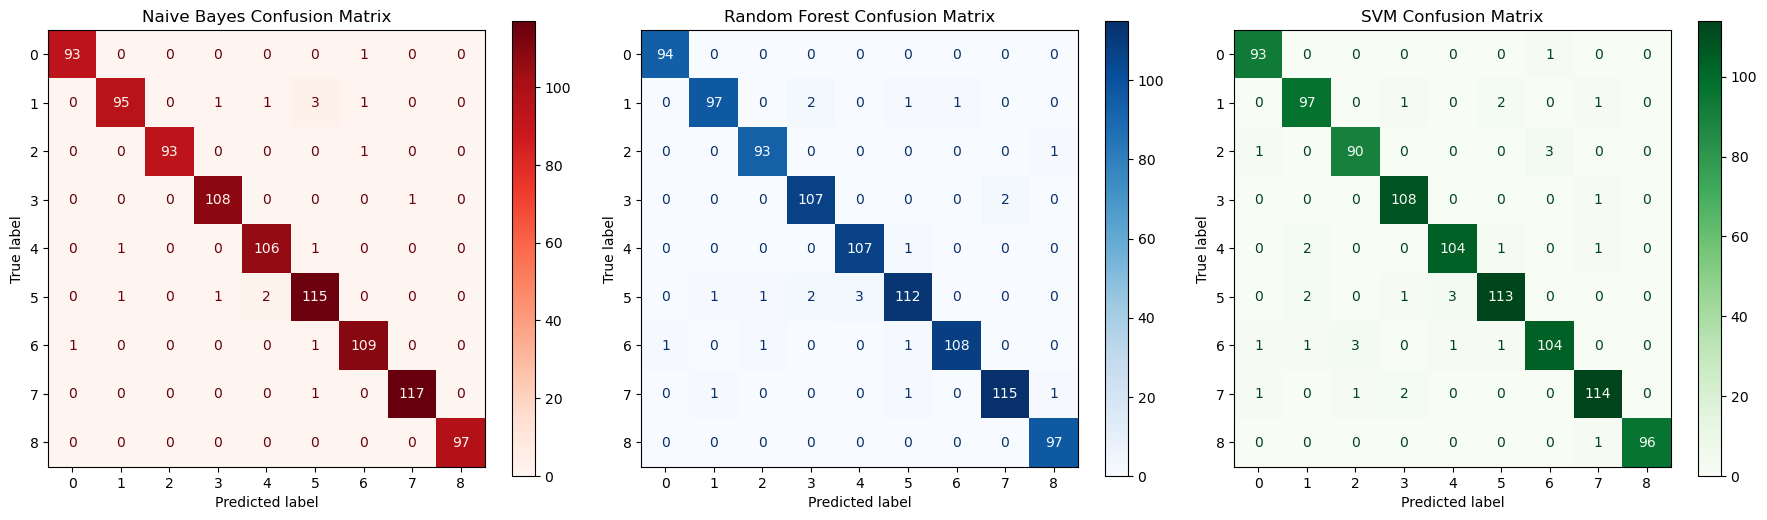

In [50]:
label_encoder = LabelEncoder()

cm1 = confusion_matrix(y_test, pred_te)
cm2 = confusion_matrix(y_test, pred2)
cm3 = confusion_matrix(y_test, pred3)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].set_title('Naive Bayes Confusion Matrix')
ax[1].set_title('Random Forest Confusion Matrix')
ax[2].set_title('SVM Confusion Matrix')

#sns.heatmap(cm1.T, square=True, annot=True, fmt='d', cbar=False,
#           xticklabels=model.classes_, yticklabels=model.classes_)
#sns.heatmap(cm2.T, square=True, annot=True, fmt='d', cbar=False,
#           xticklabels=model2.classes_, yticklabels=model2.classes_)
#sns.heatmap(cm3.T, square=True, annot=True, fmt='d', cbar=False,
#           xticklabels=model3.classes_, yticklabels=model3.classes_)

ConfusionMatrixDisplay(cm1, ).plot(values_format='d', cmap='Reds', ax=ax[0])
ConfusionMatrixDisplay(cm2, ).plot(values_format='d', cmap='Blues', ax=ax[1])
ConfusionMatrixDisplay(cm3, ).plot(values_format='d', cmap='Greens', ax=ax[2])


plt.tight_layout()
#plt.show()